In [4]:
import folium
import geemap

# Add Earth Engine drawing method to folium.
def add_ee_layer(self, ee_image_object, vis_params, name):
    map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
    folium.raster_layers.TileLayer(
        tiles=map_id_dict['tile_fetcher'].url_format,
        attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
        name=name,
        overlay=True,
        control=True
    ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

In [16]:
import ee
import folium

# Initialize the Earth Engine API
ee.Initialize()

# Define the geometry for India
india_geometry = ee.Geometry.Polygon([
    [68.1767, 7.9655], [68.1767, 35.5087], [97.4026, 35.5087], [97.4026, 7.9655], [68.1767, 7.9655]
])

# Load the Global Flood Database dataset
flood_dataset = ee.ImageCollection("GLOBAL_FLOOD_DB/MODIS_EVENTS/V1")

# Function to get flood extent for a specific month and year
def get_flood_extent(year, month):
    start_date = ee.Date.fromYMD(year, month, 1)
    end_date = start_date.advance(1, 'month')

    # Filter flood data for the specific month
    monthly_flood_collection = flood_dataset.filterDate(start_date, end_date)
    
    # Compute the flood extent for the month
    flood_extent = monthly_flood_collection.map(lambda img: img.select(0).gt(0)).sum().clip(india_geometry)

    return flood_extent

# Define the year and month for which you want to visualize the flood extent
year = 2014
month = 8

# Get the flood extent for the specified month and year
flood_extent = get_flood_extent(year, month)

# Define visualization parameters
vis_params = {
    'min': 0,
    'max': 1,
    'palette': ['white','cyan','blue']
}

# Create a folium map centered on India
map_center = [20.5937, 78.9629]  # Latitude and Longitude of India
m = folium.Map(location=map_center, zoom_start=5)

# Add the flood extent layer to the map
flood_extent_layer = folium.Map(
    location=map_center,
    zoom_start=5,
    tiles='OpenStreetMap',
    attr='Map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors'
)

# Add the flood extent layer to the map
flood_extent_layer.add_ee_layer(flood_extent, vis_params, 'Flood Extent')

# Add a layer control panel to the map
flood_extent_layer.add_child(folium.LayerControl())

# Display the map
flood_extent_layer

In [17]:
import pandas as pd

# Load the temperature data from the CSV file
temperature_file_path = "/Users/prreddy/Projects/Rajasthan Data/Rajasthan_district_monthly_temperature_1981_2023.csv"
temperature_df = pd.read_csv(temperature_file_path)

# Calculate the average monthly temperature for Rajasthan by averaging the monthly district temperatures
average_monthly_temperature = temperature_df.groupby(['Year', 'Month'])['Temperature (°C)'].mean().reset_index()

# Print the average monthly temperature
print(average_monthly_temperature)

# Save the average monthly temperature to a new CSV file
average_monthly_temperature.to_csv("rajasthan_average_monthly_temperature_1981_2023.csv", index=False)

     Year  Month  Temperature (°C)
0    2000      1         23.971952
1    2000      2         24.980248
2    2000      3         31.936219
3    2000      4         40.047533
4    2000      5         39.972355
..    ...    ...               ...
247  2020      8         33.145710
248  2020      9         35.378898
249  2020     10         35.340978
250  2020     11         28.985533
251  2020     12         25.510445

[252 rows x 3 columns]


    Year  Temperature (°C)
0   2000         32.939668
1   2001         32.759002
2   2002         33.648551
3   2003         32.460338
4   2004         33.384171
5   2005         32.530394
6   2006         33.065610
7   2007         32.977576
8   2008         32.606851
9   2009         33.699794
10  2010         33.370101
11  2011         32.564614
12  2012         32.499132
13  2013         32.225135
14  2014         32.733654
15  2015         32.651855
16  2016         31.312672
17  2017         31.385482
18  2018         31.612593
19  2019         30.255615
20  2020         31.378144


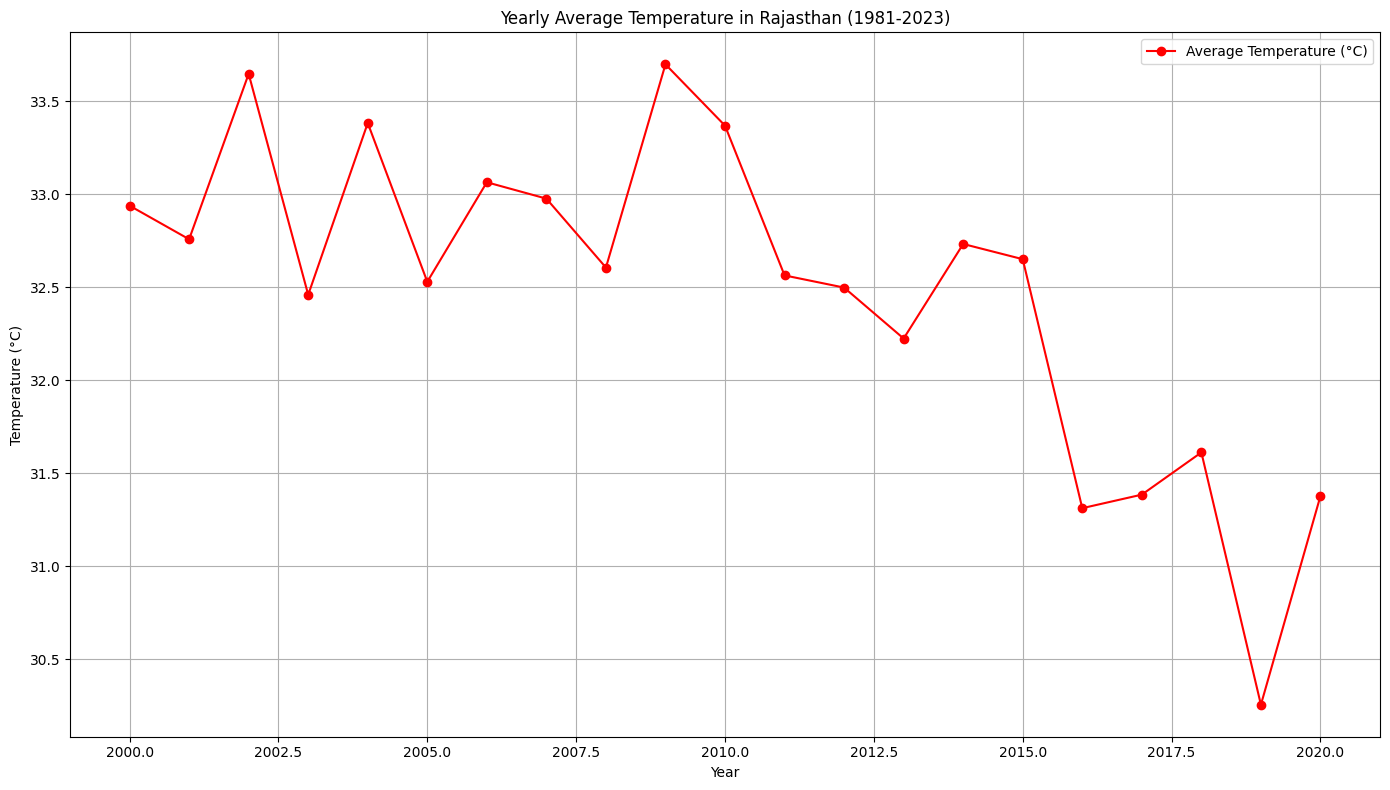

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the temperature data from the CSV file
temperature_file_path = "/Users/prreddy/Projects/Rajasthan Data/Rajasthan_district_monthly_temperature_1981_2023.csv"
temperature_df = pd.read_csv(temperature_file_path)

# Calculate the average yearly temperature for Rajasthan by averaging the monthly district temperatures
average_yearly_temperature = temperature_df.groupby(['Year'])['Temperature (°C)'].mean().reset_index()

# Print the average yearly temperature
print(average_yearly_temperature)

# Plotting the yearly average temperature
plt.figure(figsize=(14, 8))
plt.plot(average_yearly_temperature['Year'], average_yearly_temperature['Temperature (°C)'], marker='o', color='r', label='Average Temperature (°C)')

plt.title('Yearly Average Temperature in Rajasthan (1981-2023)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot to a file
plt.savefig("yearly_average_temperature_rajasthan_1981_2023.png")

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Load the data from the CSV files
temperature_file_path = "/Users/prreddy/Projects/Rajasthan Data/Rajasthan_district_monthly_temperature_1981_2023.csv"
tree_cover_file_path = "/Users/prreddy/Projects/Rajasthan Data/Rajasthan_district_annual_tree_cover_2000_2020.csv"
rainfall_file_path = "/Users/prreddy/Projects/Rajasthan Data/Rajasthan_district_monthly_rainfall_1981_2023.csv"
flooding_file_path = "/Users/prreddy/Projects/Rajasthan Data/Rajasthan_district_monthly_flooding_2000_2023.csv"

temperature_df = pd.read_csv(temperature_file_path)
tree_cover_df = pd.read_csv(tree_cover_file_path)
rainfall_df = pd.read_csv(rainfall_file_path)
flooding_df = pd.read_csv(flooding_file_path)

# Calculate the average yearly temperature for Rajasthan
average_yearly_temperature = temperature_df.groupby(['Year'])['Temperature (°C)'].mean().reset_index()

# Calculate the average yearly tree cover for Rajasthan
average_yearly_tree_cover = tree_cover_df.groupby(['Year'])['Tree Cover (%)'].mean().reset_index()

# Calculate the total yearly precipitation for Rajasthan
total_yearly_precipitation = rainfall_df.groupby(['Year'])['Rainfall (mm)'].sum().reset_index()

# Calculate the total yearly flood events and flood extent for Rajasthan
total_yearly_flooding = flooding_df.groupby(['Year'])[['Flood Events', 'Flood Extent (sq km)']].sum().reset_index()

# Merge the dataframes on Year
merged_df = pd.merge(average_yearly_temperature, average_yearly_tree_cover, on='Year')
merged_df = pd.merge(merged_df, total_yearly_precipitation, on='Year')
merged_df = pd.merge(merged_df, total_yearly_flooding, on='Year')

# Print the merged dataframe
print(merged_df)

# Save the merged dataframe to a new CSV file
merged_df.to_csv("Rajasthan_yearly_climate_data.csv", index=False)

    Year  Temperature (°C)  Tree Cover (%)  Rainfall (mm)
0   2000         32.939668        2.485258   16405.761366
1   2001         32.759002        1.911933   18603.125572
2   2002         33.648551        2.213639    9344.690226
3   2003         32.460338        1.919272   18590.801075
4   2004         33.384171        2.226891   18309.544611
5   2005         32.530394        2.978549   18146.878416
6   2006         33.065610        2.881220   19545.830782
7   2007         32.977576        2.347654   17474.164451
8   2008         32.606851        2.945822   19193.174310
9   2009         33.699794        2.548756   14502.967013
10  2010         33.370101        2.269159   24151.440680
11  2011         32.564614        2.044512   23686.755283
12  2012         32.499132        3.229048   22583.595071
13  2013         32.225135        4.183519   26413.947701
14  2014         32.733654        3.501127   18257.898655
15  2015         32.651855        3.081871   17043.169645
16  2016      

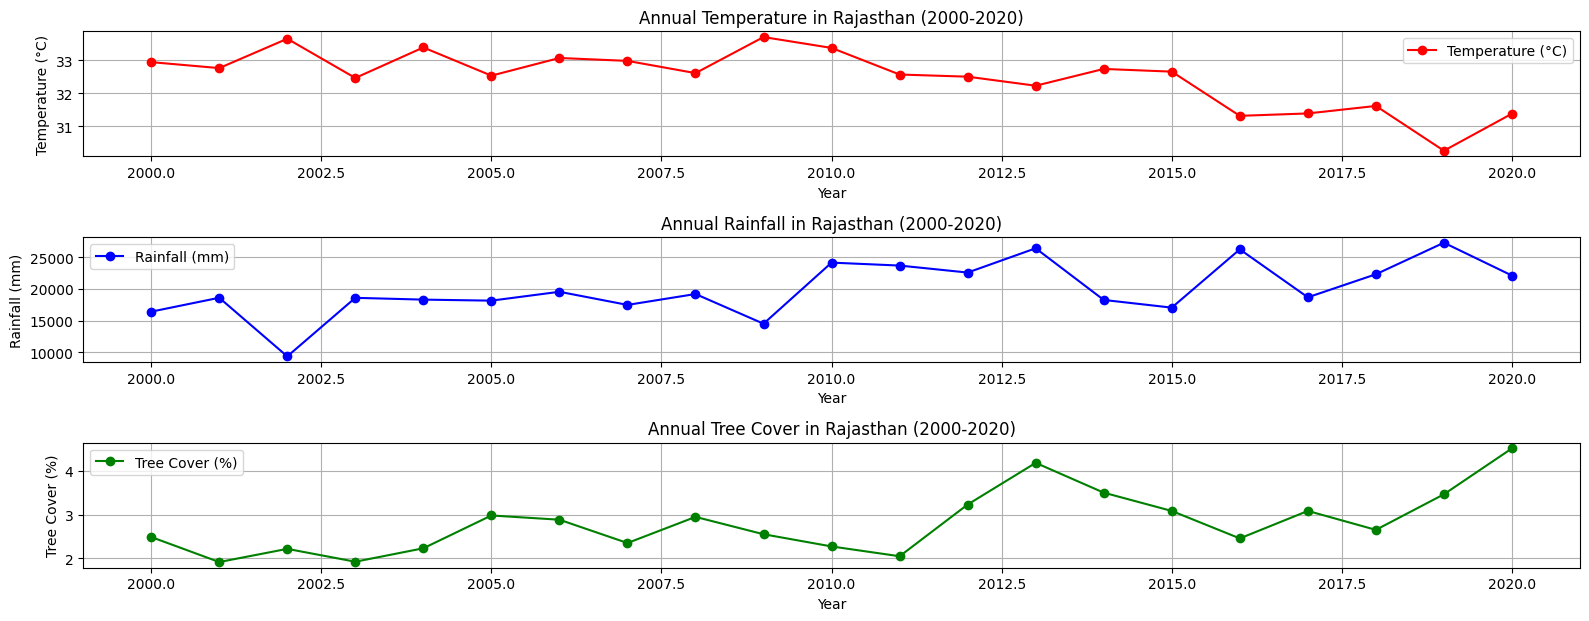

Plot saved for Rajasthan


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the yearly climate data from the CSV file
climate_data_file_path = "/Users/prreddy/Projects/Rajasthan Data/Rajasthan_yearly_climate_data.csv"
climate_df = pd.read_csv(climate_data_file_path)

# Create the output directory if it doesn't exist
output_dir = "Rajasthan_yearly_climate_plots"
os.makedirs(output_dir, exist_ok=True)

# Plotting
plt.figure(figsize=(16, 10))

# Plot temperature
plt.subplot(5, 1, 1)
plt.plot(climate_df['Year'], climate_df['Temperature (°C)'], marker='o', color='r', label='Temperature (°C)')
plt.title('Annual Temperature in Rajasthan (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()

# Plot rainfall
plt.subplot(5, 1, 2)
plt.plot(climate_df['Year'], climate_df['Rainfall (mm)'], marker='o', color='b', label='Rainfall (mm)')
plt.title('Annual Rainfall in Rajasthan (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.legend()

# Plot tree cover
plt.subplot(5, 1, 3)
plt.plot(climate_df['Year'], climate_df['Tree Cover (%)'], marker='o', color='g', label='Tree Cover (%)')
plt.title('Annual Tree Cover in Rajasthan (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Tree Cover (%)')
plt.grid(True)
plt.legend()

# # Plot flood extent
plt.subplot(5, 1, 4)
plt.plot(climate_df['Year'], climate_df['Flood Extent (sq km)'], marker='o', color='purple', label='Flood Extent (sq km)')
plt.title('Annual Flood Extent in Rajasthan (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Flood Extent (sq km)')
plt.grid(True)
plt.legend()

plt.tight_layout()

# Save the plot to the output directory
plt.savefig(os.path.join(output_dir, 'Rajasthan_yearly_climate_trends.png'))
plt.show()
plt.close()  # Close the figure to free up memory

print("Plot saved for Rajasthan")

# Show the plot
plt.show()

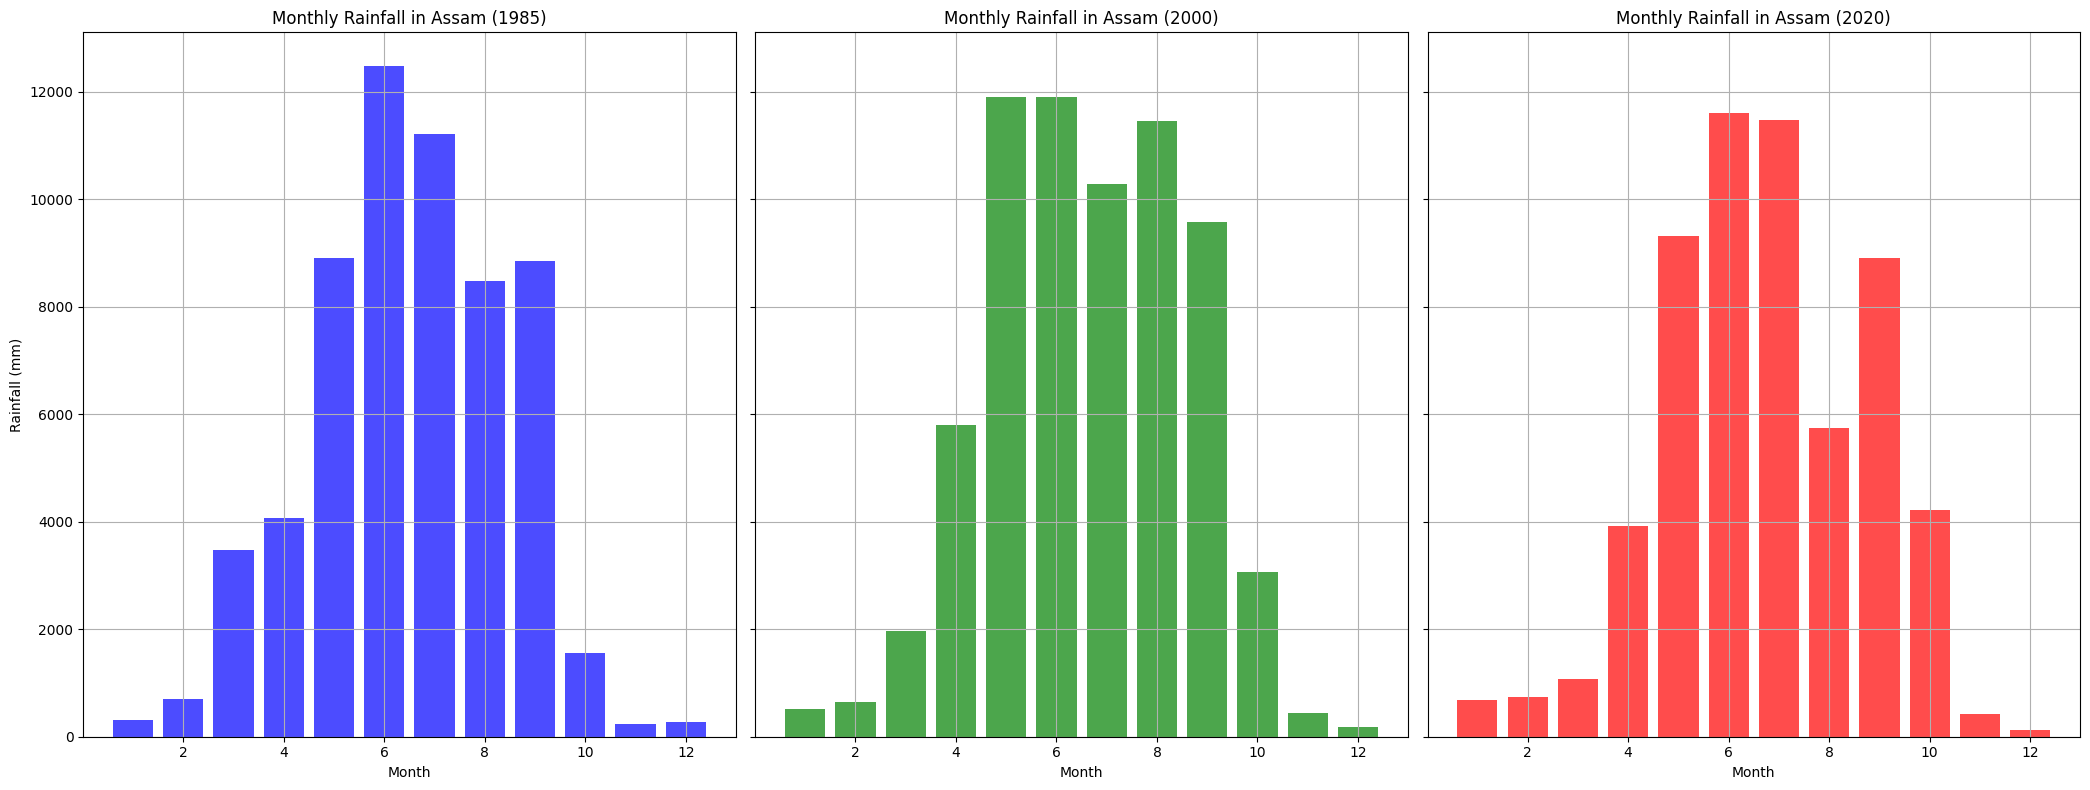

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the rainfall data from the CSV file
rainfall_file_path = "/Users/prreddy/Projects/Assam Data/Assam_district_monthly_rainfall_1981_2023.csv"
rainfall_df = pd.read_csv(rainfall_file_path)

# Filter data for the years 1985, 2000, and 2020
rainfall_1985 = rainfall_df[rainfall_df['Year'] == 1985]
rainfall_2000 = rainfall_df[rainfall_df['Year'] == 2000]
rainfall_2020 = rainfall_df[rainfall_df['Year'] == 2020]

# Group by Month and calculate the total rainfall for each month
monthly_rainfall_1985 = rainfall_1985.groupby('Month')['Rainfall (mm)'].sum().reset_index()
monthly_rainfall_2000 = rainfall_2000.groupby('Month')['Rainfall (mm)'].sum().reset_index()
monthly_rainfall_2020 = rainfall_2020.groupby('Month')['Rainfall (mm)'].sum().reset_index()

# Plotting the monthly rainfall histograms side by side
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 8), sharey=True)

# Plot for the year 1985
axes[0].bar(monthly_rainfall_1985['Month'], monthly_rainfall_1985['Rainfall (mm)'], color='b', alpha=0.7)
axes[0].set_title('Monthly Rainfall in Assam (1985)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Rainfall (mm)')
axes[0].grid(True)

# Plot for the year 2000
axes[1].bar(monthly_rainfall_2000['Month'], monthly_rainfall_2000['Rainfall (mm)'], color='g', alpha=0.7)
axes[1].set_title('Monthly Rainfall in Assam (2000)')
axes[1].set_xlabel('Month')
axes[1].grid(True)

# Plot for the year 2020
axes[2].bar(monthly_rainfall_2020['Month'], monthly_rainfall_2020['Rainfall (mm)'], color='r', alpha=0.7)
axes[2].set_title('Monthly Rainfall in Assam (2020)')
axes[2].set_xlabel('Month')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig("Assam_monthly_rainfall_1985_2000_2020.png")

# Show the plot
plt.show()

In [16]:
import ee
import folium
import geemap

# Initialize Earth Engine
ee.Initialize()

# Define India's boundary
india_boundary = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017") \
    .filter(ee.Filter.eq('country_na', 'India'))

# Load NOAA CPC Temperature dataset and select the tmax band
temperature_dataset = ee.ImageCollection("NOAA/CPC/Temperature").select("tmax")

# Improved visualization parameters
temp_vis_params = {
    'min': 10,   # Adjust to India's temperature range
    'max': 50,   # Tmax values can go higher
    'palette': ['blue', 'cyan', 'yellow', 'orange', 'red'],
    'opacity': 0.8  # Enhances visibility
}

# Generate annual mean temperature images from 2000 to 2020 with high resolution
years = list(range(2000, 2021))
annual_images = []
for year in years:
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    yearly_temp = temperature_dataset.filterDate(start_date, end_date).mean().clip(india_boundary)
    
    # Apply smoothing filter to improve quality
    smoothed_temp = yearly_temp.focal_mean(radius=3, kernelType='square')

    # Set default projection and increase image resolution by reducing scale
    high_res_temp = smoothed_temp.setDefaultProjection(
        crs='EPSG:4326', scale=5000
    ).reduceResolution(
        reducer=ee.Reducer.mean(), bestEffort=True
    ).reproject(crs='EPSG:4326', scale=2500)  # Higher resolution (default ~5000m)

    annual_images.append(high_res_temp.set("system:time_start", ee.Date(start_date).millis()))

# Convert list to ImageCollection
annual_temp_collection = ee.ImageCollection(annual_images)

# Create a Folium map centered on India
map_center = [22.0, 78.0]  # Center of India
m = geemap.Map(center=map_center, zoom=4)

# Add annual temperature images as layers
for year in years:
    image = annual_temp_collection.filter(ee.Filter.calendarRange(year, year, "year")).first()
    m.addLayer(image, temp_vis_params, f"Tmax {year}")

# Add a time slider widget
m.add_time_slider(annual_temp_collection, temp_vis_params, time_interval=1, position="bottomright")

# Display the map
m


Map(center=[22.0, 78.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

No such comm: ad7103dcbd004a3080c78681299fe625
No such comm: 06106317cb1e436bb5c1757d23a1069e
No such comm: 9c9e65076627489e9cb646af5746a372
No such comm: a572065a17f74fcc9b6353f43d29b7c7
No such comm: 71ae0966a1f144b98553f890b0e57d99
No such comm: a42072a1825f42a0945d5f6286a771ab
No such comm: 827e7d475b1e4e9f8f1674f03d87890e
No such comm: 80ffb2cd5ba04be398a30e1f2b930a85
No such comm: 3d9100b7d94d48cb954f785f3e793279
No such comm: 3719decb2a0749b38edc40b639724c8b
No such comm: 312fbac334814a78aebfbb867ad3214a
No such comm: 5af8bac802a74887a0d07bddd9106fd7
No such comm: 710380a59aa045f4a1a72780cb6c990e
No such comm: e88df6c48b5941c8bf59bafb736a3f58
No such comm: 9536f9aabb6d4b44b7ace38145290b8a
No such comm: e618c653d60f416ea62e0a0c2ebd73ce
No such comm: ef93c557f3eb466abffa1952cef6b879
No such comm: ed16750653b347dab577b56fac59afe2
No such comm: 64c8a19a958b453689694355b663f841
No such comm: fd705a574b1542daa5481b31544b9ed3
No such comm: fd705a574b1542daa5481b31544b9ed3
No such comm:

In [18]:
import ee
import geemap

# Initialize the Earth Engine API
ee.Initialize()

# Define India's boundary
india_boundary = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(ee.Filter.eq('country_na', 'India'))

# Load NOAA CPC Temperature dataset and select the tmax band
temperature_dataset = ee.ImageCollection("NOAA/CPC/Temperature").select("tmax")

# Define visualization parameters
vis_params = {
    'min': 10,
    'max': 50,
    'palette': ['blue', 'cyan', 'yellow', 'orange', 'red']
}

# Generate annual mean temperature images from 2000 to 2020
years = list(range(2000, 2021))
annual_images = []
for year in years:
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    yearly_temp = temperature_dataset.filterDate(start_date, end_date).mean().clip(india_boundary)
    annual_images.append(yearly_temp.set("system:time_start", ee.Date(start_date).millis()))

# Convert list to ImageCollection
annual_temp_collection = ee.ImageCollection(annual_images)

# Create a timelapse video
video_args = {
    'dimensions': 720,
    'region': india_boundary.geometry().bounds(),
    'framesPerSecond': 2,
    'crs': 'EPSG:4326',
    'min': 10,
    'max': 50,
    'palette': ['blue', 'cyan', 'yellow', 'orange', 'red']
}

# Generate the URL for the timelapse video
video_url = annual_temp_collection.getVideoThumbURL(video_args)
print("Timelapse video URL:", video_url)

Timelapse video URL: https://earthengine.googleapis.com/v1/projects/83314568096/videoThumbnails/e845c41bdc2c998750f984b6f7f2b9ee-6049aac6c93018a985a1b072b3940c9c:getPixels


In [31]:
import ee
import geemap
import requests

# Initialize the Earth Engine API
ee.Initialize()

# Define India's boundary
india_boundary = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(ee.Filter.eq('country_na', 'India'))

# Load NOAA CPC Temperature dataset and select the tmax band
temperature_dataset = ee.ImageCollection("NOAA/CPC/Temperature").select("tmax")

# Define visualization parameters
vis_params = {
    'min': 10,
    'max': 50,
    'palette': ['blue', 'cyan', 'yellow', 'orange', 'red']
}

# Generate annual mean temperature images from 2000 to 2020
years = list(range(2000, 2021))
annual_images = []
for year in years:
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    yearly_temp = temperature_dataset.filterDate(start_date, end_date).mean().clip(india_boundary)
    annual_images.append(yearly_temp.set("system:time_start", ee.Date(start_date).millis()))

# Convert list to ImageCollection
annual_temp_collection = ee.ImageCollection(annual_images)

# Create a timelapse video
video_args = {
    'dimensions': 720,
    'region': india_boundary.geometry().bounds(),
    'framesPerSecond': 2,
    'crs': 'EPSG:4326',
    'min': 10,
    'max': 50,
    'palette': ['blue', 'cyan', 'yellow', 'orange', 'red']
}

# Generate the URL for the timelapse video
video_url = annual_temp_collection.getVideoThumbURL(video_args)
print("Timelapse video URL:", video_url)

# Download the video
response = requests.get(video_url, stream=True)
video_file_path = 'timelapse_video.mp4'

with open(video_file_path, 'wb') as video_file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            video_file.write(chunk)

print(f"Video saved as {video_file_path}")

Timelapse video URL: https://earthengine.googleapis.com/v1/projects/83314568096/videoThumbnails/e845c41bdc2c998750f984b6f7f2b9ee-0adf89aa01385cb1b0ce31087fefe737:getPixels
Video saved as timelapse_video.mp4


In [33]:
import cv2

# Path to the video file
video_file_path = 'timelapse_video.mp4'

# Open the video file
cap = cv2.VideoCapture(video_file_path)

# Check if the video file opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
else:
    # Read and display frames in a loop
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            cv2.imshow('Video', frame)
            # Press 'q' to exit the video
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        else:
            break

    # Release the video capture object and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

2025-02-08 22:28:46.382 Python[1630:3250943] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-08 22:28:46.382 Python[1630:3250943] +[IMKInputSession subclass]: chose IMKInputSession_Modern


: 

In [2]:
import ee
import geemap
import os

# Authenticate and initialize the Earth Engine API
ee.Initialize()

# Define India's boundary
india_boundary = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filter(ee.Filter.eq('country_na', 'India'))

# Load NOAA CPC Temperature dataset and select the tmax band
temperature_dataset = ee.ImageCollection("NOAA/CPC/Temperature").select("tmax")

# Define visualization parameters
vis_params = {
    'min': 10,
    'max': 50,
    'palette': ['blue', 'cyan', 'yellow', 'orange', 'red']
}

# Create a directory to save the images
output_dir = 'india_monthly_temperature_maps'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Generate monthly temperature maps from 2000 to 2020
years = list(range(2000, 2021))
months = list(range(1, 13))

for year in years:
    for month in months:
        start_date = f"{year}-{month:02d}-01"
        end_date = f"{year}-{month:02d}-28" if month == 2 else f"{year}-{month:02d}-30"
        monthly_temp = temperature_dataset.filterDate(start_date, end_date).mean().clip(india_boundary)
        map_id = monthly_temp.getMapId(vis_params)
        map_url = map_id['tile_fetcher'].url_format
        image_path = os.path.join(output_dir, f"india_temperature_{year}_{month:02d}.png")
        geemap.download_ee_image(
            monthly_temp, 
            image_path, 
            scale=1000, 
            region=india_boundary.geometry(), 
            crs='EPSG:4326'
        )
        print(f"Saved image: {image_path}")

india_temperature_2000_01.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: None


Saved image: india_monthly_temperature_maps/india_temperature_2000_01.png


india_temperature_2000_02.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_02.png


india_temperature_2000_03.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_03.png


india_temperature_2000_04.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_04.png


india_temperature_2000_05.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_05.png


india_temperature_2000_06.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_06.png


india_temperature_2000_07.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_07.png


india_temperature_2000_08.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_08.png


india_temperature_2000_09.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_09.png


india_temperature_2000_10.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_10.png


india_temperature_2000_11.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_11.png


india_temperature_2000_12.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2000_12.png


india_temperature_2001_01.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_01.png


india_temperature_2001_02.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_02.png


india_temperature_2001_03.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_03.png


india_temperature_2001_04.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_04.png


india_temperature_2001_05.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_05.png


india_temperature_2001_06.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_06.png


india_temperature_2001_07.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_07.png


india_temperature_2001_08.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_08.png


india_temperature_2001_09.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_09.png


india_temperature_2001_10.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_10.png


india_temperature_2001_11.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_11.png


india_temperature_2001_12.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2001_12.png


india_temperature_2002_01.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_01.png


india_temperature_2002_02.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_02.png


india_temperature_2002_03.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_03.png


india_temperature_2002_04.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_04.png


india_temperature_2002_05.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_05.png


india_temperature_2002_06.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_06.png


india_temperature_2002_07.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_07.png


india_temperature_2002_08.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_08.png


india_temperature_2002_09.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_09.png


india_temperature_2002_10.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_10.png


india_temperature_2002_11.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_11.png


india_temperature_2002_12.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2002_12.png


india_temperature_2003_01.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2003_01.png


india_temperature_2003_02.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2003_02.png


india_temperature_2003_03.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)

Saved image: india_monthly_temperature_maps/india_temperature_2003_03.png


india_temperature_2003_04.png: |          | 0.00/83.4M (raw) [  0.0%] in 00:00 (eta:     ?)